In [1]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/elsevier/Bert-NER'
%cd $path
import utils_train
import utils_annotate
import os
!pip install highlight-text
import matplotlib.pyplot as plt
from highlight_text import HighlightText

Mounted at /content/drive
/content/drive/MyDrive/elsevier/Bert-NER


In [2]:
file_list = os.listdir('individual_ner/')
print(len(file_list))
# file_list

59


In [7]:
record = file_list[-1]
print(record)
file = f'individual_ner/{record}'
data = utils_annotate.load_json(file)

10.1016j.cpc.2021.108132.json


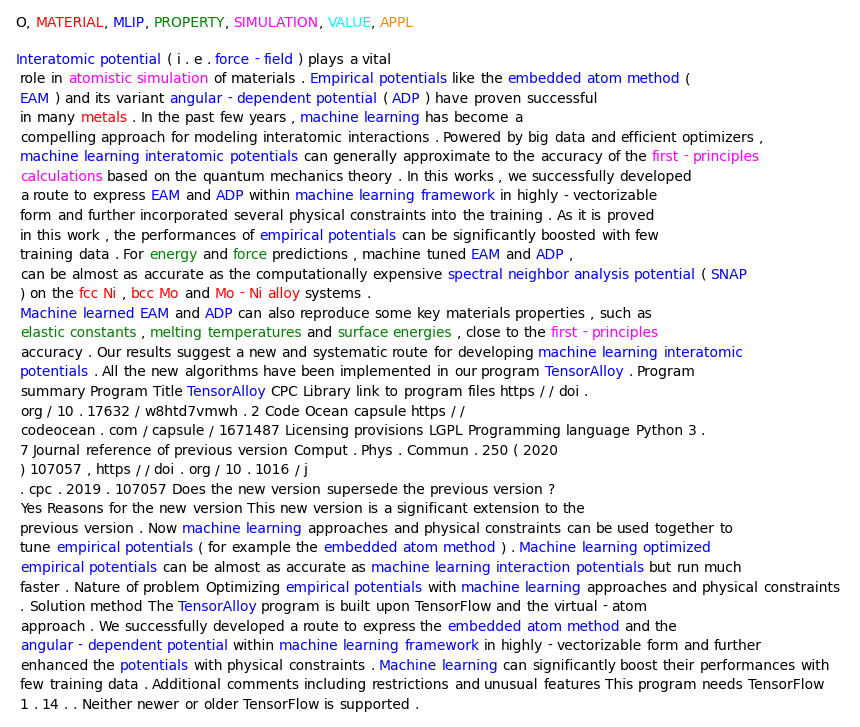

In [8]:
colors = {'O': 'black', 'MATERIAL': 'red', 'MLIP': 'blue', 'PROPERTY': 'green',
          'SIMULATION': 'magenta', 'VALUE': 'cyan', 'APPL': 'darkorange'}
word_list_marked = ['<' + w + '>' for w in data['words']]
markers = [{"color": colors[i]} for i in data['ner']]
j = 0
for i in range(len(data['words'])):
    if (i + 1) % 15 == 0:
        word_list_marked.insert(i + j, '\n')
        j += 1
fig, ax = plt.subplots()
ax.set_axis_off()
HighlightText(x=0., y=1, s='<O>, <MATERIAL>, <MLIP>, <PROPERTY>, <SIMULATION>, <VALUE>, <APPL>',
              highlight_textprops=[{"color": c} for c in list(colors.values())], ax=ax)
HighlightText(x=0., y=0.9, s=' '.join(word_list_marked),
              highlight_textprops=markers, ax=ax)
plt.show()

In [6]:
new_rec, new_rec4check = utils_annotate.revise(file,
 [152], 'O', overwrite=True)

In [5]:
rec = utils_annotate.check(file)
rec

[(0, 'Interatomic', 'MLIP'),
 (1, 'potential', 'MLIP'),
 (2, '(', 'O'),
 (3, 'i', 'O'),
 (4, '.', 'O'),
 (5, 'e', 'O'),
 (6, '.', 'O'),
 (7, 'force', 'MLIP'),
 (8, '-', 'MLIP'),
 (9, 'field', 'MLIP'),
 (10, ')', 'O'),
 (11, 'plays', 'O'),
 (12, 'a', 'O'),
 (13, 'vital', 'O'),
 (14, 'role', 'O'),
 (15, 'in', 'O'),
 (16, 'atomistic', 'SIMULATION'),
 (17, 'simulation', 'SIMULATION'),
 (18, 'of', 'O'),
 (19, 'materials', 'O'),
 (20, '.', 'O'),
 (21, 'Empirical', 'MLIP'),
 (22, 'potentials', 'MLIP'),
 (23, 'like', 'O'),
 (24, 'the', 'O'),
 (25, 'embedded', 'MLIP'),
 (26, 'atom', 'MLIP'),
 (27, 'method', 'MLIP'),
 (28, '(', 'O'),
 (29, 'EAM', 'MLIP'),
 (30, ')', 'O'),
 (31, 'and', 'O'),
 (32, 'its', 'O'),
 (33, 'variant', 'O'),
 (34, 'angular', 'MLIP'),
 (35, '-', 'MLIP'),
 (36, 'dependent', 'MLIP'),
 (37, 'potential', 'MLIP'),
 (38, '(', 'O'),
 (39, 'ADP', 'MLIP'),
 (40, ')', 'O'),
 (41, 'have', 'O'),
 (42, 'proven', 'O'),
 (43, 'successful', 'O'),
 (44, 'in', 'O'),
 (45, 'many', 'O'),
 (46

In [ ]:
word_list, categories = utils_annotate.reannotate(file, ['O', 'MATERIAL', 'MLIP', 'PROPERTY', 'SIMULATION'])